In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('clean_data.csv',index_col = [0],)

In [130]:
print('columns of dataset are: ')
print(df.columns)

columns of dataset are: 
Index(['Name', 'Age', 'Overall', 'Potential', 'Preferred Foot', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Height', 'Weight', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')


In [131]:
print('target variables labels are:')
print(df['Position'].unique())

target variables labels are:
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'LAM' 'RWB'
 'LWB']


In [132]:
#unqiue attributes of categorical columns
print('Preferred Foot')
print(df['Preferred Foot'].unique())
print(df['Preferred Foot'].value_counts())
print('')

print('Work Rate')
print(df['Work Rate'].unique())
print(df['Work Rate'].value_counts())
print('')



Preferred Foot
['Left' 'Right']
Right    12823
Left      3820
Name: Preferred Foot, dtype: int64

Work Rate
['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium' 'Low/ Low']
Medium/ Medium    9019
High/ Medium      2886
Medium/ High      1572
High/ High         931
Medium/ Low        769
High/ Low          621
Low/ Medium        413
Low/ High          404
Low/ Low            28
Name: Work Rate, dtype: int64



In [133]:
#defining a fucntion to change cell values as per the need
df_reduced = df.copy()
def change_categories(cell_value):
    attackers = ['ST','LW','RW','LS','RS','CF','RF','LF']
    midfielders = ['CM','RM','LM','CAM','CDM','LCM','RCM','RDM','LDM','RAM','LAM']
    defenders = ['CB','LB','RB','RCB','LCB','RWB','LWB']
    goalkeepers = ['GK']
    if cell_value in attackers:
        return 'Attacker'
    
    if cell_value in midfielders:
        return 'Midfielder'
    
    if cell_value in defenders:
        return 'Defender'
        
    if cell_value in goalkeepers:
        return 'Goalkeeper'
df_reduced['Position']=df_reduced['Position'].apply(lambda x : change_categories(x))

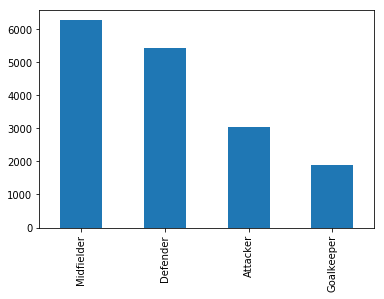

In [134]:
#lets again plot to notice the distribution of players across more genetal categories
df_reduced['Position'].value_counts().plot(kind = 'bar')

this seems more  a wider distribution which can be worked with


Lets know get more insights into data as there a wide variety of attributes many of which may be redundant, it makes sense 
to go for dimension reduction

In [135]:
#lets separate the categorical,numerical attributes and labels from each other
df_numerical = df.drop(columns=['Preferred Foot','Work Rate','Name'])
df_numerical = df_numerical.drop(columns = ['Position','Release Clause'])
df_categorical = df[['Preferred Foot','Work Rate']]
target_position = df_reduced['Position']
target_release_clause = df['Release Clause']

In [136]:
print('No. of numerical attributes:',len(df_numerical.columns))
print('')
print('No. of categorical attributes:',len(df_categorical.columns))
print('')
print('No. of records:',len(df))
print('')
print('Numerical attributes:',df_numerical.columns)
print('')
print('Categorical aatributes:',df_categorical.columns)
print('')
print('')
print('Target Position Labels:',target_position.unique())
print('')
print('Target Release Clause Labels :',target_release_clause.values)

No. of numerical attributes: 40

No. of categorical attributes: 2

No. of records: 16643

Numerical attributes: Index(['Age', 'Overall', 'Potential', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

Categorical aatributes: Index(['Preferred Foot', 'Work Rate'], dtype='object')


Target Position Labels: ['Attacker' 'Goalkeeper' 'Midfielder' 'Defender']

Target Release Clause Labels : [2.265e+02 1.271e+02 2.281e+02 ... 1.650e-01 1.430e-01 1.650e-01]


In [137]:
#encoding categorical data
df_categorical_encoded_one_hot = pd.get_dummies(df_categorical,)
df_categorical_encoded_one_hot.head()

,Preferred Foot_Left,Preferred Foot_Right,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0


# Feature Selection

## Mutual information

In [138]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest

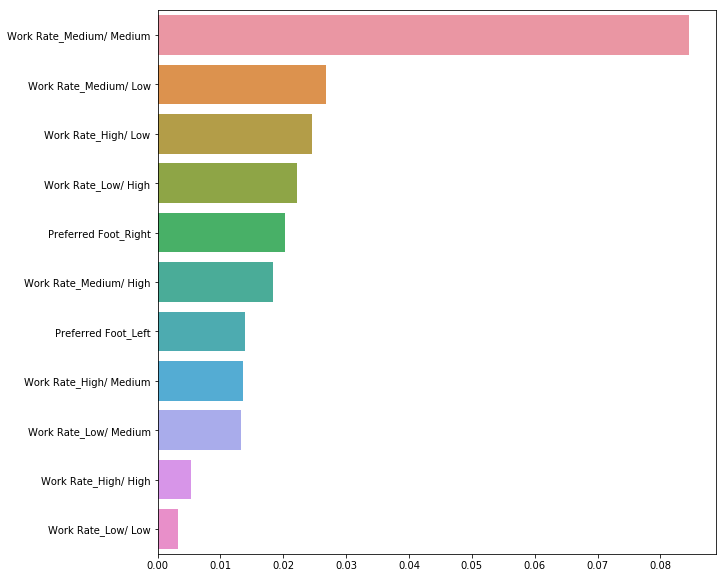

In [139]:
plt.figure(figsize=(10,10))
mutual_info_values_categ = mutual_info_classif(df_categorical_encoded,target_position)
s = pd.Series(mutual_info_values_categ,index = df_categorical_encoded.columns).sort_values(ascending=False)
sns.barplot(y = s.index,x=s)


## we can see there is not much mutual information between Position and categorical attributes , so it makes sense to drop these categorical attributes for predicting position

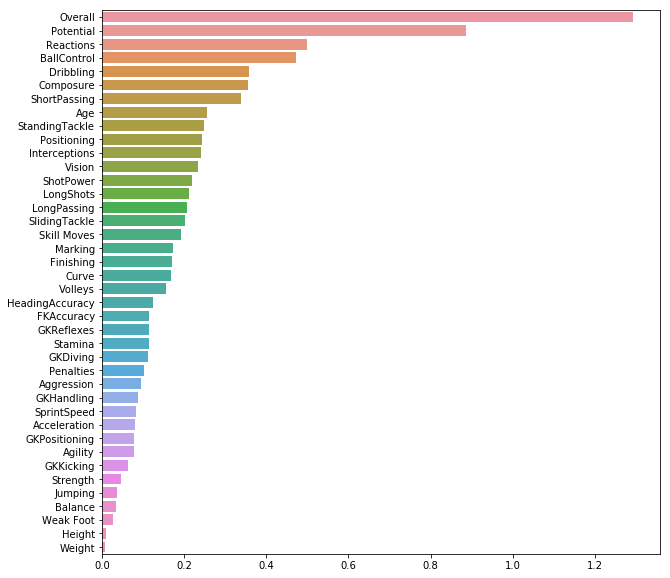

In [140]:
plt.figure(figsize=(10,10))
mutual_info_values_reg = mutual_info_regression(df_numerical,target_release_clause)
s = pd.Series(mutual_info_values_reg,index = df_numerical.columns).sort_values(ascending=False)
sns.barplot(y = s.index,x=s)

## Only overall and potential seem as clear indicators for predicting release clause,however overall and potential are calculated based on other attributes so , it makes sense to drop these attributes with respect to predictions

In [141]:
df_numerial = df_numerical.drop(columns = ['Potential','Overall'])

In [142]:
df_numerical.columns

Index(['Age', 'Overall', 'Potential', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

## Principal Component Ananlysis

In [143]:
#using principal component analysis to decompose into reduced dimensions
#PCA only works on numerical attributes
from sklearn.decomposition import PCA

#choosing the right number of dimesions i.e preserving 95% of dataset's variance
pca = PCA()
pca.fit(df_numerical)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
d

16

we need to preserve atleast 15 components to preserve 95% variance of data, this is good reduction more than half reduction from orginal 38 numerical attributes

In [144]:
#transform dataset 
pca = PCA(n_components = 16)
df_numerical_reduced = pca.fit_transform(df_numerical)

In [145]:
pca.explained_variance_ratio_

array([0.55344481, 0.18020107, 0.06381988, 0.04837529, 0.02700853,
       0.0133326 , 0.01120578, 0.00866237, 0.00801713, 0.00727566,
       0.00675606, 0.00624015, 0.00554872, 0.00504389, 0.00475545,
       0.00430931])

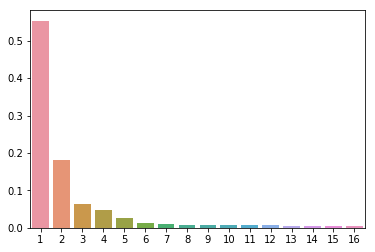

In [146]:
sns.barplot( y = pca.explained_variance_ratio_,x = [i for i in range(1,17)],)

In [147]:
df_numerical_reduced.shape

(16643, 16)

In [148]:
#lets save this transformed numerical dataset as a numpy array
labels_array_position = target_position.to_numpy()
labels_array_release_clause = target_release_clause.to_numpy()
np.savez('dataset_numerical_PCA_transformed',Position=labels_array_position,X=df_numerical_reduced,Release_Clause=labels_array_release_clause )